In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
import boto3
from botocore.client import Config


class ObjectStorage:
    def __init__(self):
        self.client = boto3.client(
            "s3",
            endpoint_url=os.environ["MINIO_ENDPOINT"],
            aws_access_key_id=os.environ["MINIO_ACCESS_KEY"],
            aws_secret_access_key=os.environ["MINIO_SECRET_KEY"],
            region_name=os.getenv("MINIO_REGION", "us-east-1"),
            config=Config(signature_version="s3v4"),
        )


storage = ObjectStorage()
bucket = os.environ["MINIO_BUCKET"]

In [4]:
from io import BytesIO


prices = pd.read_csv(
    BytesIO(
        storage.client.get_object(
            Bucket=bucket,
            Key="historycal_price/dataset_historical_price.csv",
        )["Body"].read()
    ),
    low_memory=False,
)


prices["date"] = pd.to_datetime(prices["date"])


prices["adjusted_close"] = prices["close_price"] * prices["adj_ratio"]


prices = prices.rename(
    columns={
        "vol_total": "volume",
        "open_price": "open",
        "low_price": "low",
        "high_price": "high",
        "close_price": "close",
    }
)

prices = prices.sort_values(["symbol", "date"])

In [5]:
import datetime as dt

start = pd.Timestamp("2000-01-01")
end = pd.Timestamp(dt.date.today().year - 1, 12, 31)


fpt = prices.loc[
    (prices["symbol"] == "FPT")
    & (prices["date"] >= start)
    & (prices["date"] <= end),
    ["date", "symbol", "volume", "open", "low", "high", "close", "adjusted_close"],
].copy()

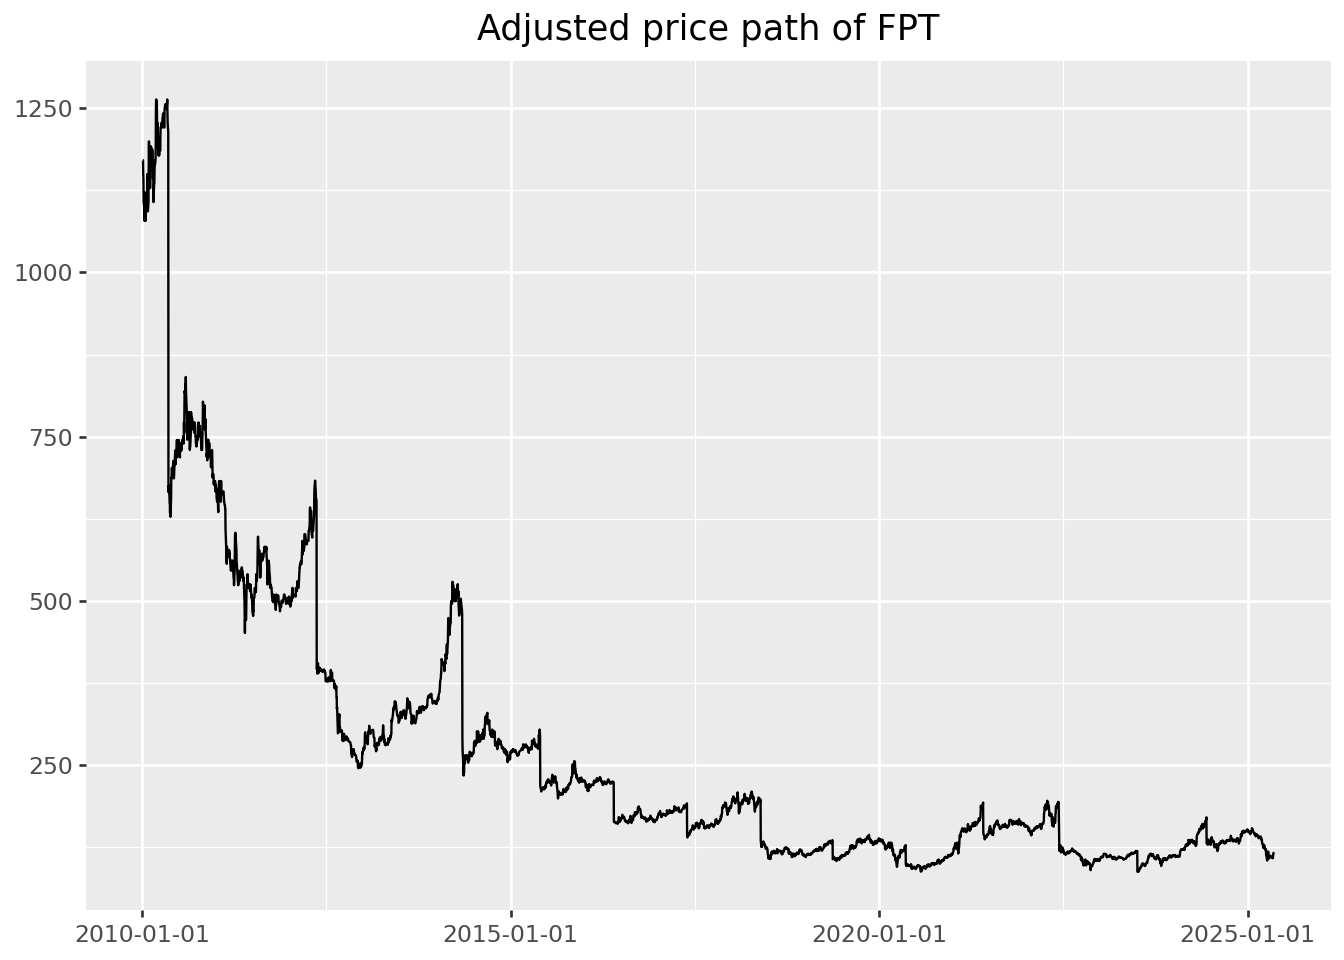

In [6]:
from plotnine import ggplot, aes, geom_line, labs

(
    ggplot(fpt, aes(x="date", y="adjusted_close"))
    + geom_line()
    + labs(title="Adjusted price path of FPT", x="", y="")
)

In [7]:
prices.loc[prices["adjusted_close"] <= 0, ["symbol", "date", "adjusted_close"]].head()

,symbol,date,adjusted_close
33886,ADP,2010-02-09,0.0
33887,ADP,2010-02-24,0.0
33888,ADP,2010-03-01,0.0
33889,ADP,2010-03-03,0.0
33890,ADP,2010-03-12,0.0


In [8]:
returns = (
    prices
    .loc[prices["adjusted_close"] > 0]
    .sort_values(["symbol", "date"])
    .assign(ret=lambda x: x.groupby("symbol")["adjusted_close"].pct_change())
    [["symbol", "date", "ret"]]
)
returns = returns.dropna(subset=["ret"])

In [9]:
def winsorize_cs(df, column="ret", lower_q=0.01, upper_q=0.99):
    lo = df[column].quantile(lower_q)
    hi = df[column].quantile(upper_q)
    out = df.copy()
    out[column] = out[column].clip(lo, hi)
    return out

returns = winsorize_cs(returns)

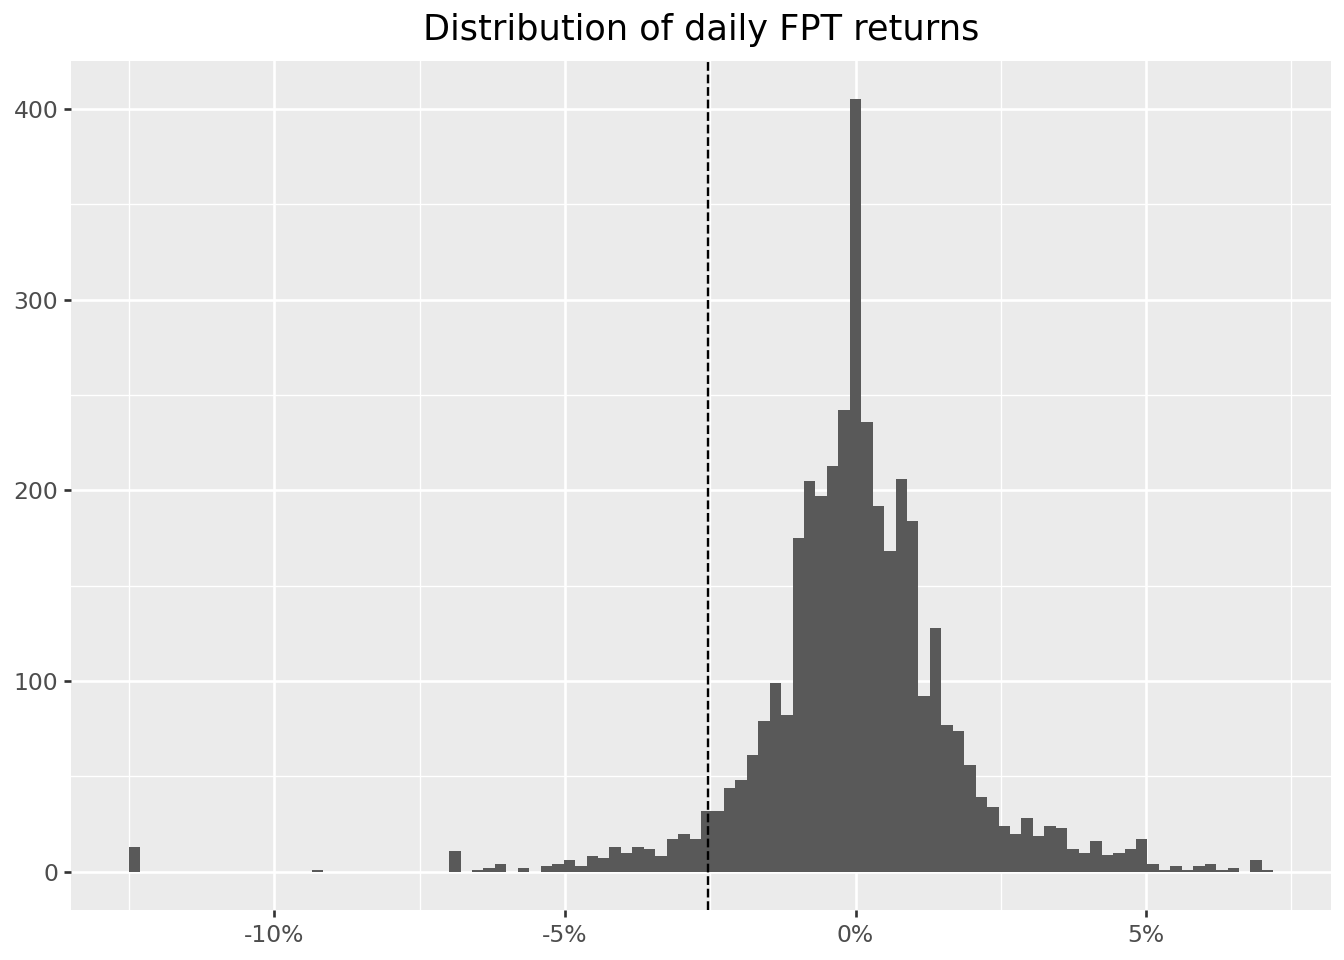

In [10]:
from mizani.formatters import percent_format
from plotnine import geom_histogram, geom_vline, scale_x_continuous


fpt_ret = returns.loc[returns["symbol"] == "FPT"].copy()
q05 = fpt_ret["ret"].quantile(0.05)


(
    ggplot(fpt_ret, aes(x="ret"))
    + geom_histogram(bins=100)
    + geom_vline(xintercept=q05, linetype="dashed")
    + scale_x_continuous(labels=percent_format())
    + labs(title="Distribution of daily FPT returns", x="", y="")
)

In [11]:
returns["ret"].describe().round(3)

count    4305063.000
mean           0.000
std            0.035
min           -0.125
25%           -0.004
50%            0.000
75%            0.003
max            0.130
Name: ret, dtype: float64

In [12]:
(
    returns
    .assign(year=lambda x: x["date"].dt.year)
    .groupby("year")["ret"]
    .describe()
    .round(3)
)

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2010,131548.0,-0.001,0.036,-0.125,-0.021,0.0,0.018,0.13
2011,166826.0,-0.003,0.033,-0.125,-0.020,0.0,0.011,0.13
2012,177938.0,0.000,0.033,-0.125,-0.012,0.0,0.015,0.13
2013,180417.0,0.001,0.033,-0.125,-0.004,0.0,0.008,0.13
2014,181907.0,0.001,0.034,-0.125,-0.008,0.0,0.011,0.13
2015,197881.0,0.000,0.033,-0.125,-0.006,0.0,0.005,0.13
2016,227896.0,0.000,0.035,-0.125,-0.005,0.0,0.003,0.13
2017,283642.0,0.001,0.034,-0.125,-0.002,0.0,0.001,0.13
2018,329887.0,0.000,0.035,-0.125,0.000,0.0,0.000,0.13


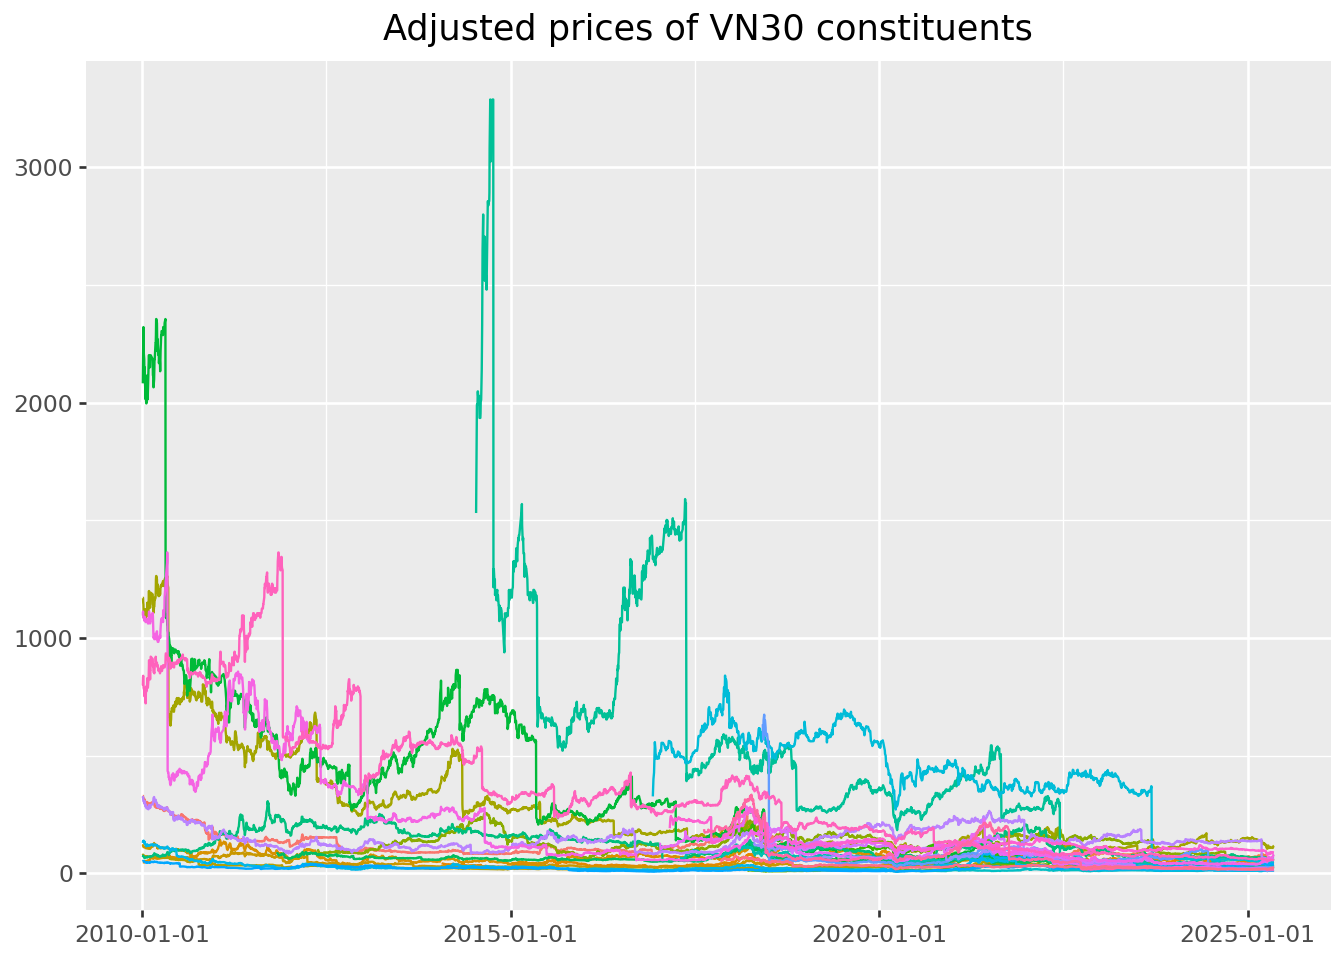

In [13]:
vn30 = [
    "ACB","BCM","BID","BVH","CTG","FPT","GAS","GVR","HDB","HPG",
    "MBB","MSN","MWG","PLX","POW","SAB","SHB","SSB","STB","TCB",
    "TPB","VCB","VHM","VIB","VIC","VJC","VNM","VPB","VRE","EIB",
]


prices_vn30 = prices.loc[prices["symbol"].isin(vn30)]
from plotnine import theme


(
    ggplot(prices_vn30, aes(x="date", y="adjusted_close", color="symbol"))
    + geom_line()
    + labs(title="Adjusted prices of VN30 constituents", x="", y="")
    + theme(legend_position="none")
)

In [14]:
returns_vn30 = (
    prices_vn30
    .sort_values(["symbol", "date"])
    .assign(ret=lambda x: x.groupby("symbol")["adjusted_close"].pct_change())
    [["symbol", "date", "ret"]]
    .dropna()
)


returns_vn30.groupby("symbol")["ret"].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
ACB,3822.0,-0.000,0.023,-0.407,-0.006,0.0,0.007,0.097
BCM,1795.0,0.001,0.027,-0.136,-0.010,0.0,0.010,0.159
BID,2811.0,0.000,0.024,-0.369,-0.010,0.0,0.011,0.070
BVH,3825.0,0.000,0.024,-0.097,-0.012,0.0,0.012,0.070
CTG,3825.0,0.000,0.024,-0.376,-0.010,0.0,0.010,0.070
EIB,3825.0,-0.000,0.022,-0.302,-0.008,0.0,0.008,0.070
FPT,3825.0,-0.000,0.024,-0.439,-0.008,0.0,0.009,0.070
GAS,3236.0,0.000,0.022,-0.289,-0.009,0.0,0.010,0.070
GVR,1775.0,0.001,0.030,-0.137,-0.014,0.0,0.016,0.169


In [15]:
returns_monthly = (
    returns_vn30
    .assign(month=lambda x: x["date"].dt.to_period("M").dt.to_timestamp())
    .groupby(["symbol", "month"], as_index=False)
    .agg(ret=("ret", lambda x: np.prod(1 + x) - 1))
)

In [16]:
import pandas as pd
import numpy as np
import tidyfinance as tf

In [17]:
import os
import boto3
from botocore.client import Config

class ConnectMinio:
    def __init__(self):
        self.MINIO_ENDPOINT = os.environ["MINIO_ENDPOINT"]
        self.MINIO_ACCESS_KEY = os.environ["MINIO_ACCESS_KEY"]
        self.MINIO_SECRET_KEY = os.environ["MINIO_SECRET_KEY"]
        self.REGION = os.getenv("MINIO_REGION", "us-east-1")

        self.s3 = boto3.client(
            "s3",
            endpoint_url=self.MINIO_ENDPOINT,
            aws_access_key_id=self.MINIO_ACCESS_KEY,
            aws_secret_access_key=self.MINIO_SECRET_KEY,
            region_name=self.REGION,
            config=Config(signature_version="s3v4"),
        )

    def test_connection(self):
        resp = self.s3.list_buckets()
        print("Connected. Buckets:")
        for b in resp.get("Buckets", []):
            print(" -", b["Name"])


conn = ConnectMinio()
s3 = conn.s3
conn.test_connection()

bucket_name = os.environ["MINIO_BUCKET"]

Connected. Buckets:
 - dsteam-data
 - rawbctc


In [18]:
import pandas as pd
from io import BytesIO
import datetime as dt

prices = pd.read_csv(
    BytesIO(
        s3.get_object(
            Bucket=bucket_name,
            Key="historycal_price/dataset_historical_price.csv"
        )["Body"].read()
    ),
    low_memory=False
)

prices["date"] = pd.to_datetime(prices["date"])

prices["adjusted_close"] = prices["close_price"] * prices["adj_ratio"]

prices = prices.rename(columns={
    "vol_total": "volume",
    "open_price": "open",
    "low_price": "low",
    "high_price": "high",
    "close_price": "close"
})

prices = prices.sort_values(["symbol", "date"])

In [19]:
start_date = pd.Timestamp("2000-01-01")
end_date = pd.Timestamp(dt.date.today().year - 1, 12, 31)

fpt_prices = prices.loc[
    (prices["symbol"] == "FPT") &
    (prices["date"] >= start_date) &
    (prices["date"] <= end_date),
    ["date","symbol","volume","open","low","high","close","adjusted_close"]
].copy()

fpt_prices.head(3)

,date,symbol,volume,open,low,high,close,adjusted_close
571413,2010-01-04,FPT,235620,81.0,79.0,82.5,82.5,1170.9885
571414,2010-01-05,FPT,200040,85.5,82.5,85.5,82.5,1170.9885
571415,2010-01-06,FPT,94870,82.5,79.5,83.5,81.0,1149.6978


In [20]:
from plotnine import *

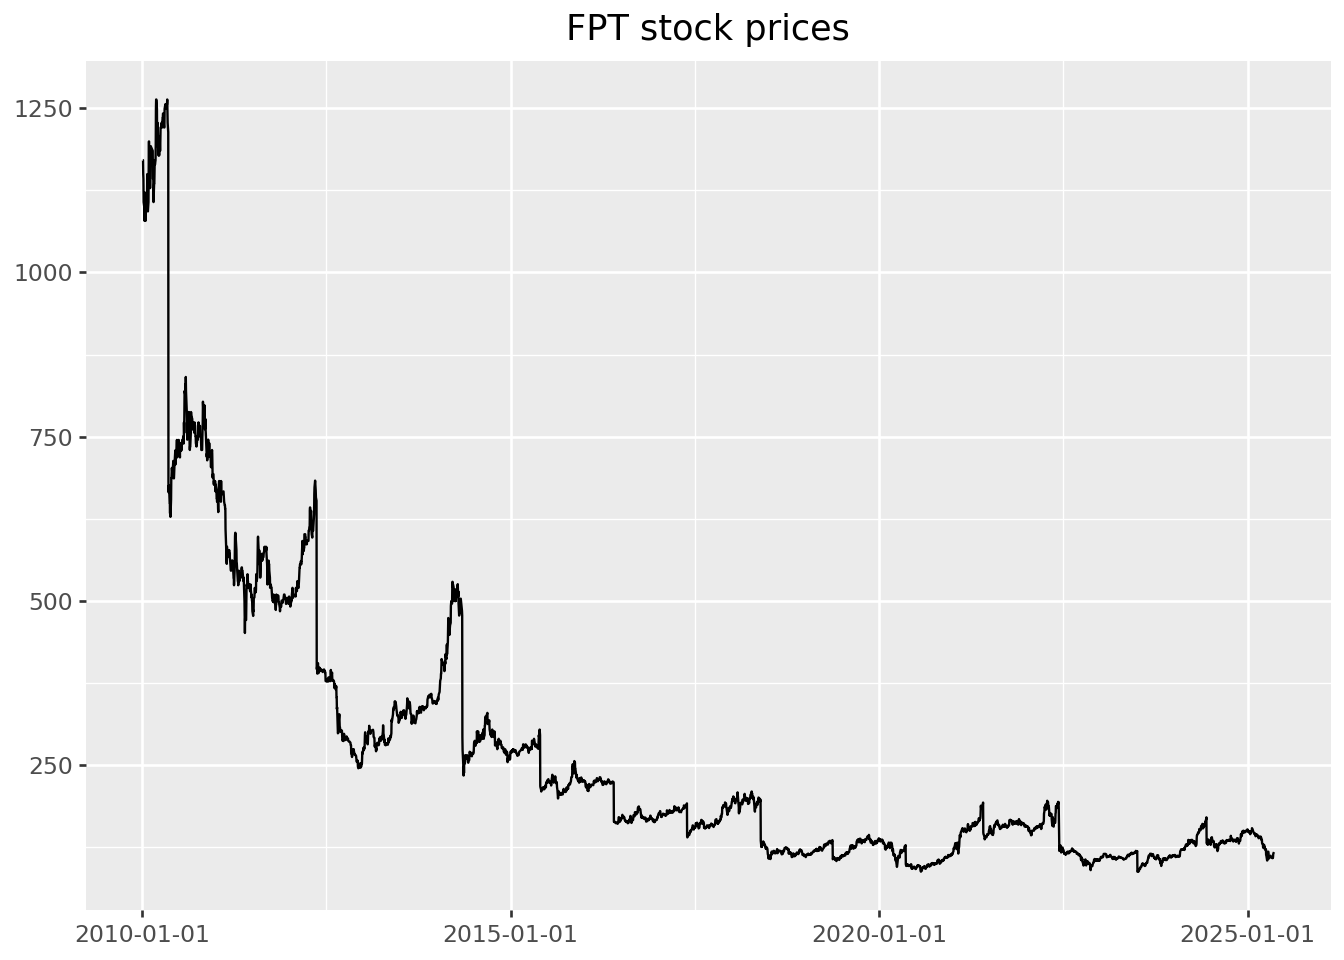

In [21]:
#| label: fig-100
#| fig-cap: Prices are in VND, adjusted for dividend payments and stock splits.
#| fig-alt: 'Title: FPT stock prices'
fpt_prices_figure = (
  ggplot(fpt_prices, aes(y="adjusted_close", x="date"))
  + geom_line()
  + labs(x="", y="", title="FPT stock prices")
)
fpt_prices_figure.show()

In [22]:
prices.loc[prices["adjusted_close"] == 0, ["symbol","date","adjusted_close"]].head()

,symbol,date,adjusted_close
33886,ADP,2010-02-09,0.0
33887,ADP,2010-02-24,0.0
33888,ADP,2010-03-01,0.0
33889,ADP,2010-03-03,0.0
33890,ADP,2010-03-12,0.0


In [23]:
returns = (
  # remove adjusted price less than or equal to 0
    prices[prices["adjusted_close"] > 0].copy()
      .sort_values(["symbol", "date"])
      .assign(ret=lambda x: x.groupby("symbol")["adjusted_close"].pct_change())
      [["symbol", "date", "ret"]]
)

returns.head()

,symbol,date,ret
2186677,A32,2018-10-23,NaN
2186678,A32,2018-10-24,0.0
2186679,A32,2018-10-25,0.0
2186680,A32,2018-10-26,0.0
2186681,A32,2018-10-29,0.0


In [24]:
import numpy as np

def winsorize_returns(df, col="ret", lower_pct=0.001, upper_pct=0.999):
    """
    Winsorize return series based on percentiles.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing returns
    col : str
        Column name of return series
    lower_pct : float
        Lower percentile cutoff (default 0.1%)
    upper_pct : float
        Upper percentile cutoff (default 99.9%)

    Returns
    -------
    pandas.DataFrame
        DataFrame with winsorized return column
    """
    lower = df[col].quantile(lower_pct)
    upper = df[col].quantile(upper_pct)

    df = df.copy()
    df[col] = df[col].clip(lower, upper)
    return df

In [25]:
# 1% / 99%
returns = winsorize_returns(returns, lower_pct=0.01, upper_pct=0.99)

In [26]:
returns = returns.dropna() 

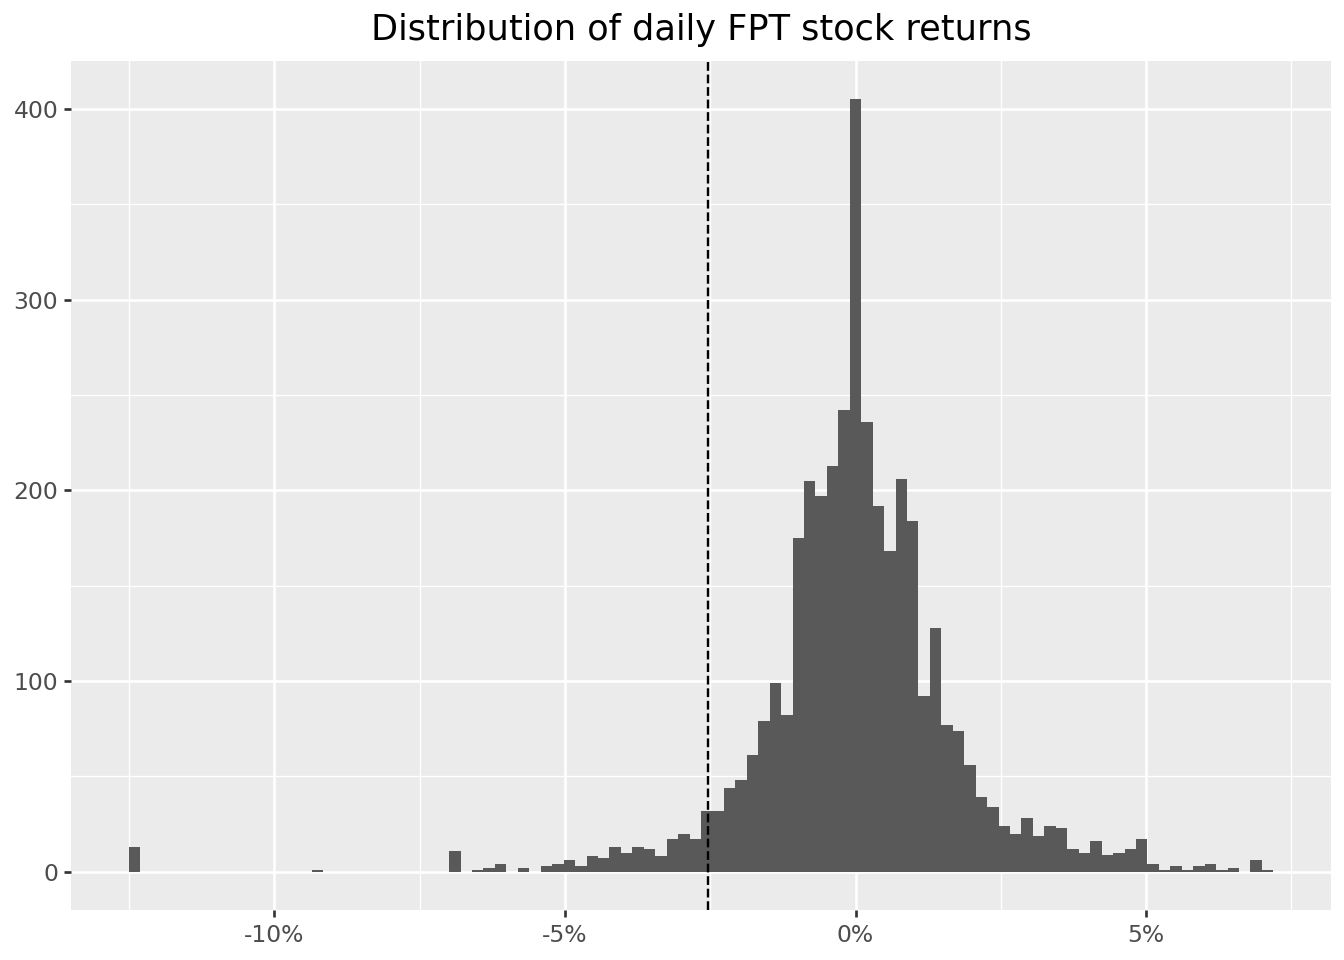

In [27]:
#| label: fig-101
#| fig-alt: 'Title: Distribution of daily FPT stock returns in percent. The figure shows a histogram of daily returns. The range indicates a few large negative values, while the remaining returns are distributed around zero. The vertical line indicates that the historical five percent quantile of daily returns was around negative three percent.'
#| fig-cap: The dotted vertical line indicates the historical five percent quantile.
from mizani.formatters import percent_format

fpt_returns = returns[returns["symbol"] == "FPT"].copy()

quantile_05 = fpt_returns["ret"].quantile(0.05)

fpt_returns_figure = (
  ggplot(fpt_returns, aes(x="ret"))
  + geom_histogram(bins=100)
  + geom_vline(aes(xintercept=quantile_05), linetype="dashed")
  + labs(x="", y="", title="Distribution of daily FPT stock returns")
  + scale_x_continuous(labels=percent_format())
)

fpt_returns_figure.show()

In [28]:
pd.DataFrame(returns["ret"].describe()).round(3).T

,count,mean,std,min,25%,50%,75%,max
ret,4305063.0,0.0,0.035,-0.125,-0.004,0.0,0.003,0.13


In [29]:
(returns["ret"]
  .groupby(returns["date"].dt.year)
  .describe()
  .round(3)
)

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2010,131548.0,-0.001,0.036,-0.125,-0.021,0.0,0.018,0.13
2011,166826.0,-0.003,0.033,-0.125,-0.020,0.0,0.011,0.13
2012,177938.0,0.000,0.033,-0.125,-0.012,0.0,0.015,0.13
2013,180417.0,0.001,0.033,-0.125,-0.004,0.0,0.008,0.13
2014,181907.0,0.001,0.034,-0.125,-0.008,0.0,0.011,0.13
2015,197881.0,0.000,0.033,-0.125,-0.006,0.0,0.005,0.13
2016,227896.0,0.000,0.035,-0.125,-0.005,0.0,0.003,0.13
2017,283642.0,0.001,0.034,-0.125,-0.002,0.0,0.001,0.13
2018,329887.0,0.000,0.035,-0.125,0.000,0.0,0.000,0.13


In [30]:
vn30_symbols = [
    "ACB","BCM","BID","BVH","CTG","FPT","GAS","GVR","HDB","HPG",
    "MBB","MSN","MWG","PLX","POW","SAB","SHB","SSB","STB","TCB",
    "TPB","VCB","VHM","VIB","VIC","VJC","VNM","VPB","VRE","EIB"
]

In [31]:
prices_daily = prices[prices["symbol"].isin(vn30_symbols)]

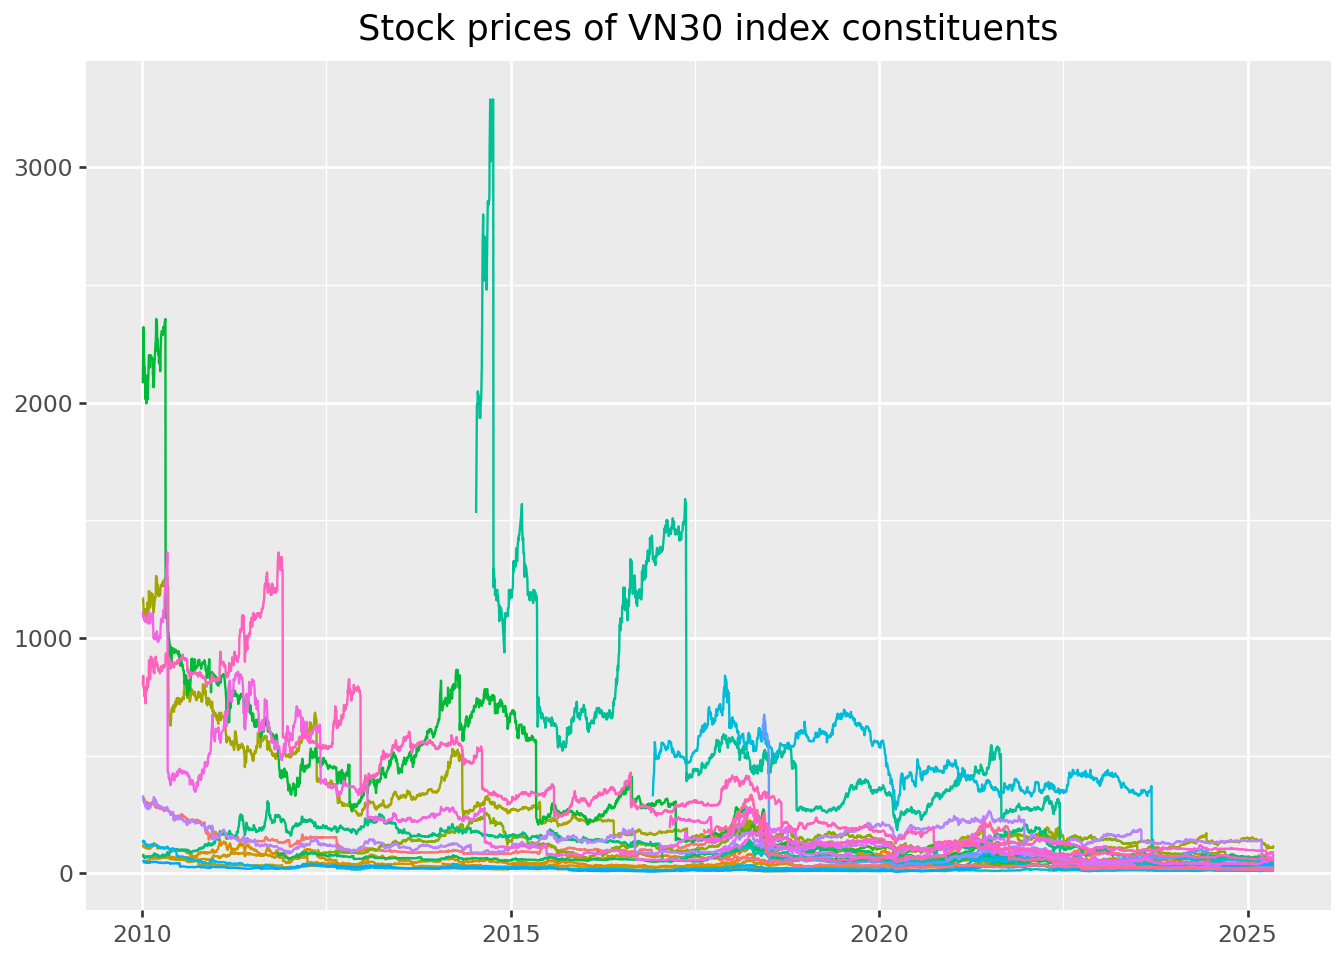

In [32]:
#| label: fig-102
#| fig-cap: Prices in VND, adjusted for dividend payments and stock splits.
#| fig-alt: 'Title: Stock prices of VN30 index constituents. The figure shows many time series with daily prices.'
prices_figure = (
  ggplot(prices_daily, aes(y="adjusted_close", x="date", color="symbol"))
  + geom_line()
  + scale_x_datetime(date_breaks="5 years", date_labels="%Y")
  + labs(x="", y="", color="", title="Stock prices of VN30 index constituents")
  + theme(legend_position="none")
)
prices_figure.show()

In [33]:
returns_daily = (prices_daily
  .assign(ret=lambda x: x.groupby("symbol")["adjusted_close"].pct_change())
  .get(["symbol", "date", "ret"])
  .dropna(subset="ret")
)

(returns_daily
  .groupby("symbol")["ret"]
  .describe()
  .round(3)
)

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
ACB,3822.0,-0.000,0.023,-0.407,-0.006,0.0,0.007,0.097
BCM,1795.0,0.001,0.027,-0.136,-0.010,0.0,0.010,0.159
BID,2811.0,0.000,0.024,-0.369,-0.010,0.0,0.011,0.070
BVH,3825.0,0.000,0.024,-0.097,-0.012,0.0,0.012,0.070
CTG,3825.0,0.000,0.024,-0.376,-0.010,0.0,0.010,0.070
EIB,3825.0,-0.000,0.022,-0.302,-0.008,0.0,0.008,0.070
FPT,3825.0,-0.000,0.024,-0.439,-0.008,0.0,0.009,0.070
GAS,3236.0,0.000,0.022,-0.289,-0.009,0.0,0.010,0.070
GVR,1775.0,0.001,0.030,-0.137,-0.014,0.0,0.016,0.169


In [34]:
returns_monthly = (returns_daily
  .assign(date=returns_daily["date"].dt.to_period("M").dt.to_timestamp())
  .groupby(["symbol", "date"], as_index=False)
  .agg(ret=("ret", lambda x: np.prod(1 + x) - 1))
)

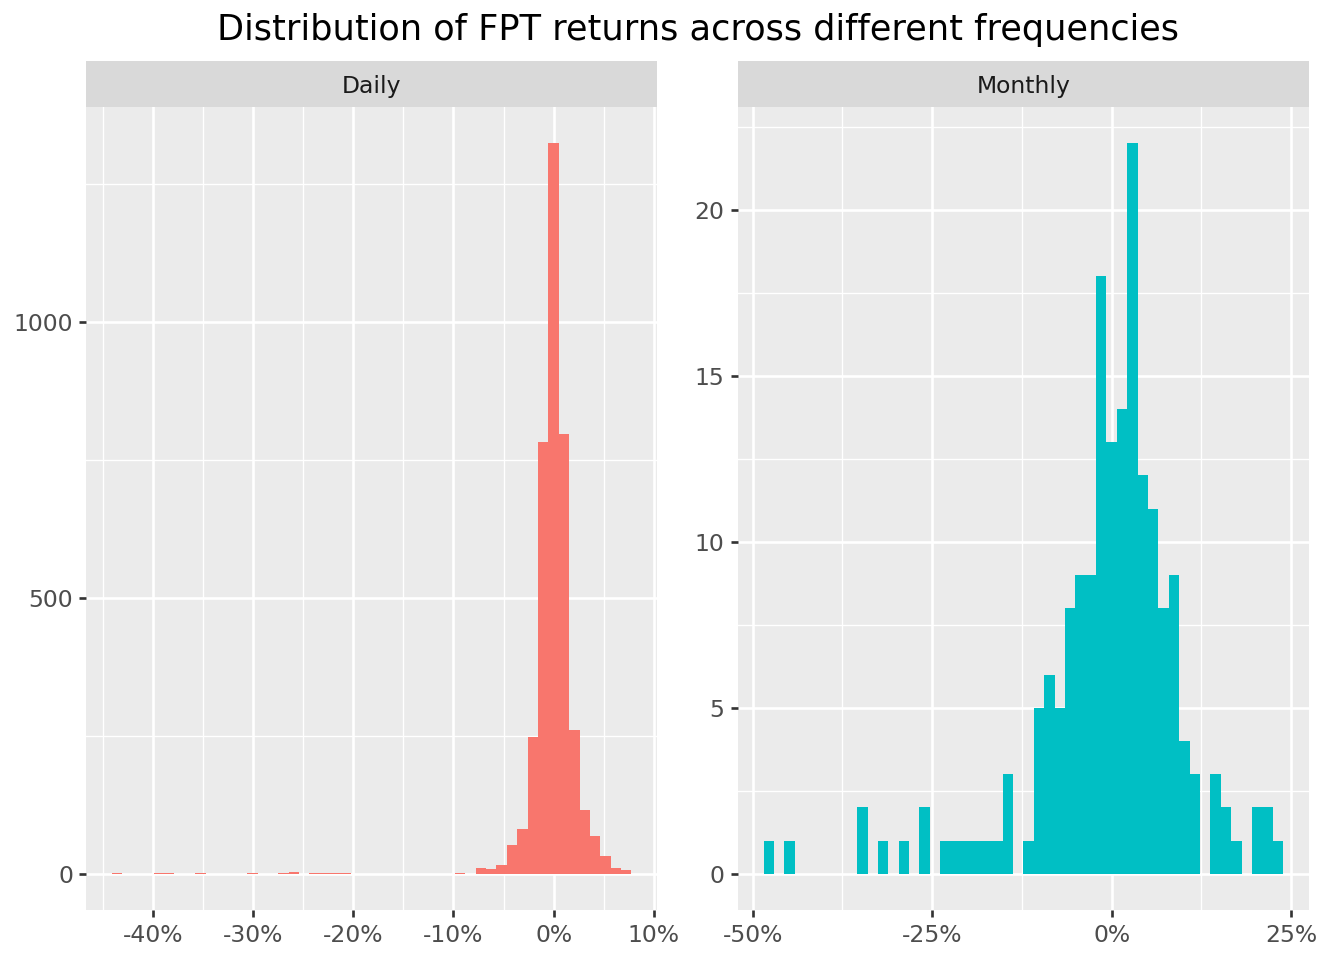

In [35]:
#| label: fig-103
#| fig-cap: Returns are based on prices adjusted for dividend payments and stock splits.
#| fig-alt: 'Title: Distribution of FPT returns across different frequencies. The figure shows the distribution of daily and monthly returns in two separate facets.'
fpt_daily = (returns_daily
  .query("symbol == 'FPT'")
  .assign(frequency="Daily")
)

fpt_monthly = (returns_monthly
  .query("symbol == 'FPT'")
  .assign(frequency="Monthly")
)

fpt_returns = pd.concat([fpt_daily, fpt_monthly], ignore_index=True)

fpt_returns_figure = (
  ggplot(fpt_returns, aes(x="ret", fill="frequency"))
  + geom_histogram(position="identity", bins=50)
  + labs(
      x="", y="", fill="Frequency",
      title="Distribution of FPT returns across different frequencies"
  )
  + scale_x_continuous(labels=percent_format())
  + facet_wrap("frequency", scales="free")
  + theme(legend_position="none")
)
fpt_returns_figure.show()

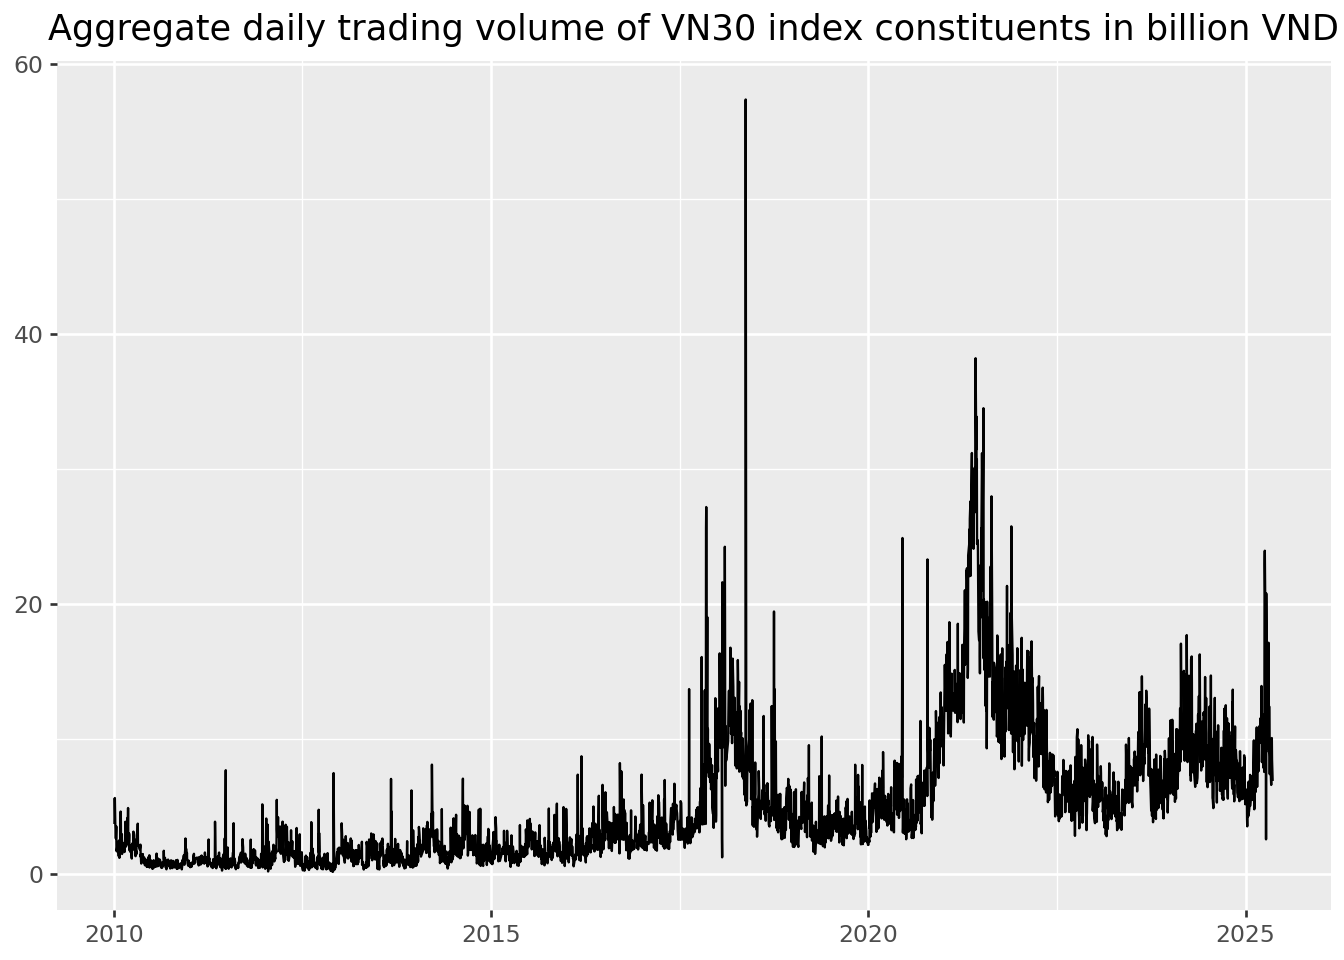

In [36]:
#| label: fig-104
#| fig-cap: Total daily trading volume in billion VND.
#| fig-alt: 'Title: Aggregate daily trading volume of VN30 index constitutens. The figure shows a volatile time series of daily trading volume.'
trading_volume = (prices_daily
  .assign(trading_volume=lambda x: (x["volume"]*x["adjusted_close"])/1e9)
  .groupby("date")["trading_volume"]
  .sum()
  .reset_index()
  .assign(trading_volume_lag=lambda x: x["trading_volume"].shift(periods=1))
)

trading_volume_figure = (
  ggplot(trading_volume, aes(x="date", y="trading_volume"))
  + geom_line()
  + scale_x_datetime(date_breaks="5 years", date_labels="%Y")
  + labs(
      x="", y="",
      title="Aggregate daily trading volume of VN30 index constituents in billion VND"
    )
)
trading_volume_figure.show()

/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


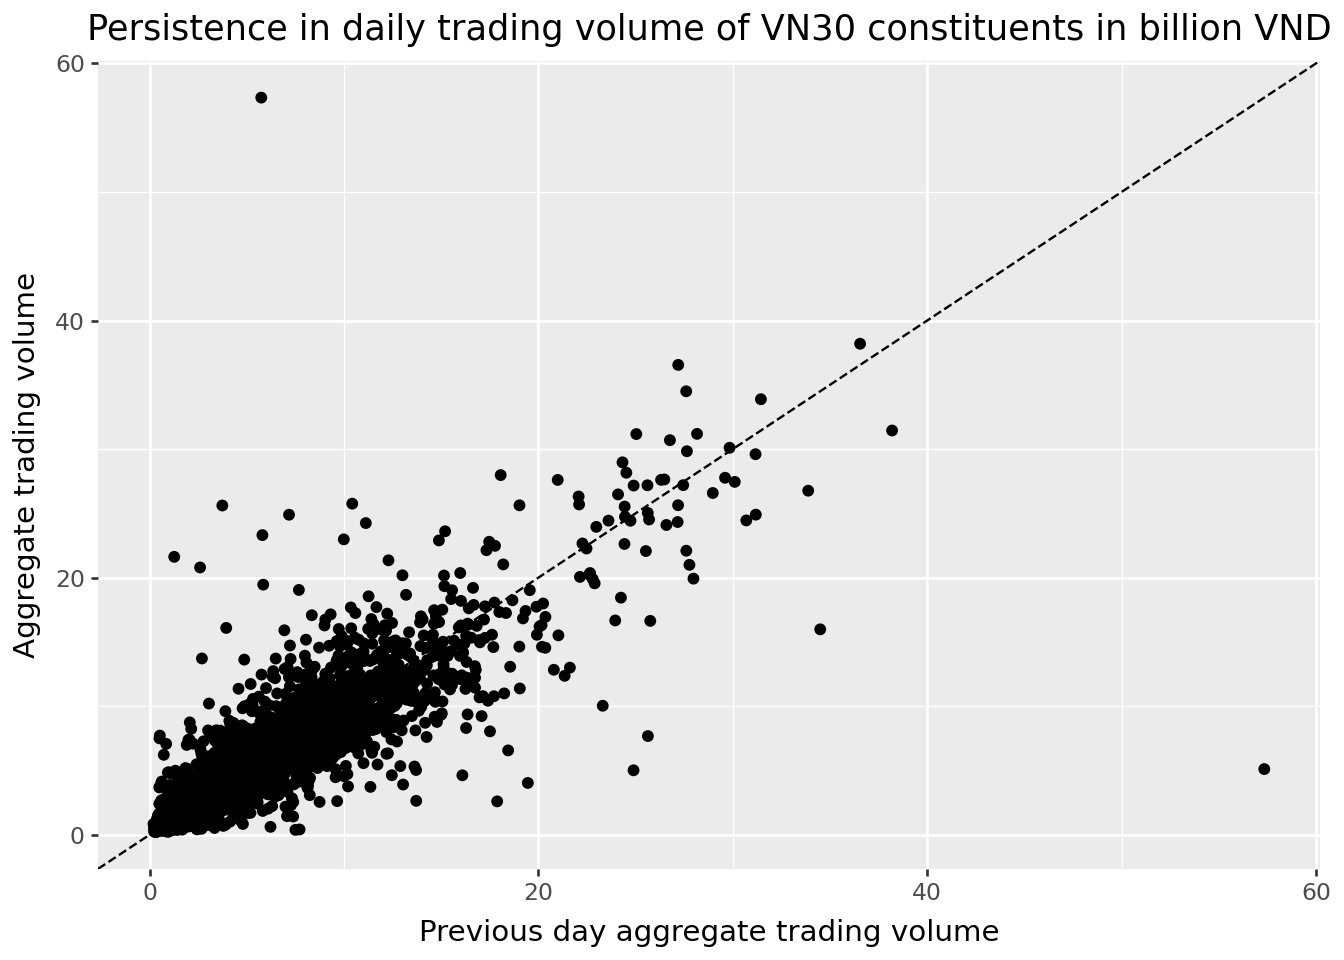

In [37]:
#| label: fig-105
#| fig-cap: Total daily trading volume in billion VND.
#| fig-alt: 'Title: Persistence in daily trading volume of VN30 index constituents. The figure shows a scatterplot where aggregate trading volume and previous-day aggregate trading volume neatly line up along a 45-degree line.'
persistence_figure = (
  ggplot(trading_volume, aes(x="trading_volume_lag", y="trading_volume"))
  + geom_point()
  + geom_abline(aes(intercept=0, slope=1), linetype="dashed")
  + labs(
      x="Previous day aggregate trading volume",
      y="Aggregate trading volume",
      title="Persistence in daily trading volume of VN30 constituents in billion VND"
    )
)
persistence_figure.show()